# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

### Download Cifar10 dataset

In [2]:
torch.cuda.is_available()

False

* transform_cifrar = T.compose():  Is used to transform the images to tensors and the normalize them. In T.Normalize() we receive 2 arrays, the first one has the mean and the second one the standard deviation, each one for each channel. 

After transforming the data, we will get the train, validation and test set. 

* cifar10_train, cifar10_val, cifart10_test: The dataset object allows to group the data and the labels. We tell it where we want to donwload it, if we want to get the training data we use the parameter train=True, if we want the test data we use train=False. The transform parameter is used to apply the transformations to the data.

* train_loader, val_loader, test_loader: The DataLoader object is used to make our datasets iterable, in order to create the minibatches. We pass the dataset object, the batch_size and sampler = sampler.SubsetRandomSampler(range([val, train or test])) to shuffle the data.

In [3]:
DATA_PATH = '../cifar-10-batches-py'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, 
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../cifar-10-batches-py
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

We have 781 batches of 64 images in the training set. Resulting in the total of 50000 images from the cifar10 dataset.

In [5]:
train_loader.batch_size

64

In [ ]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

### Using  GPUs

In [9]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: horse


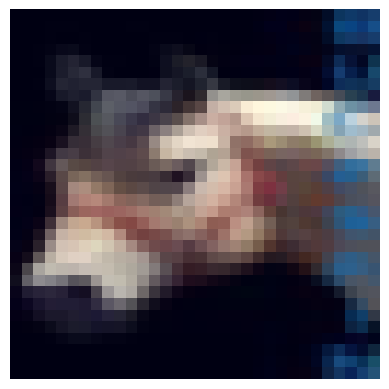

In [10]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


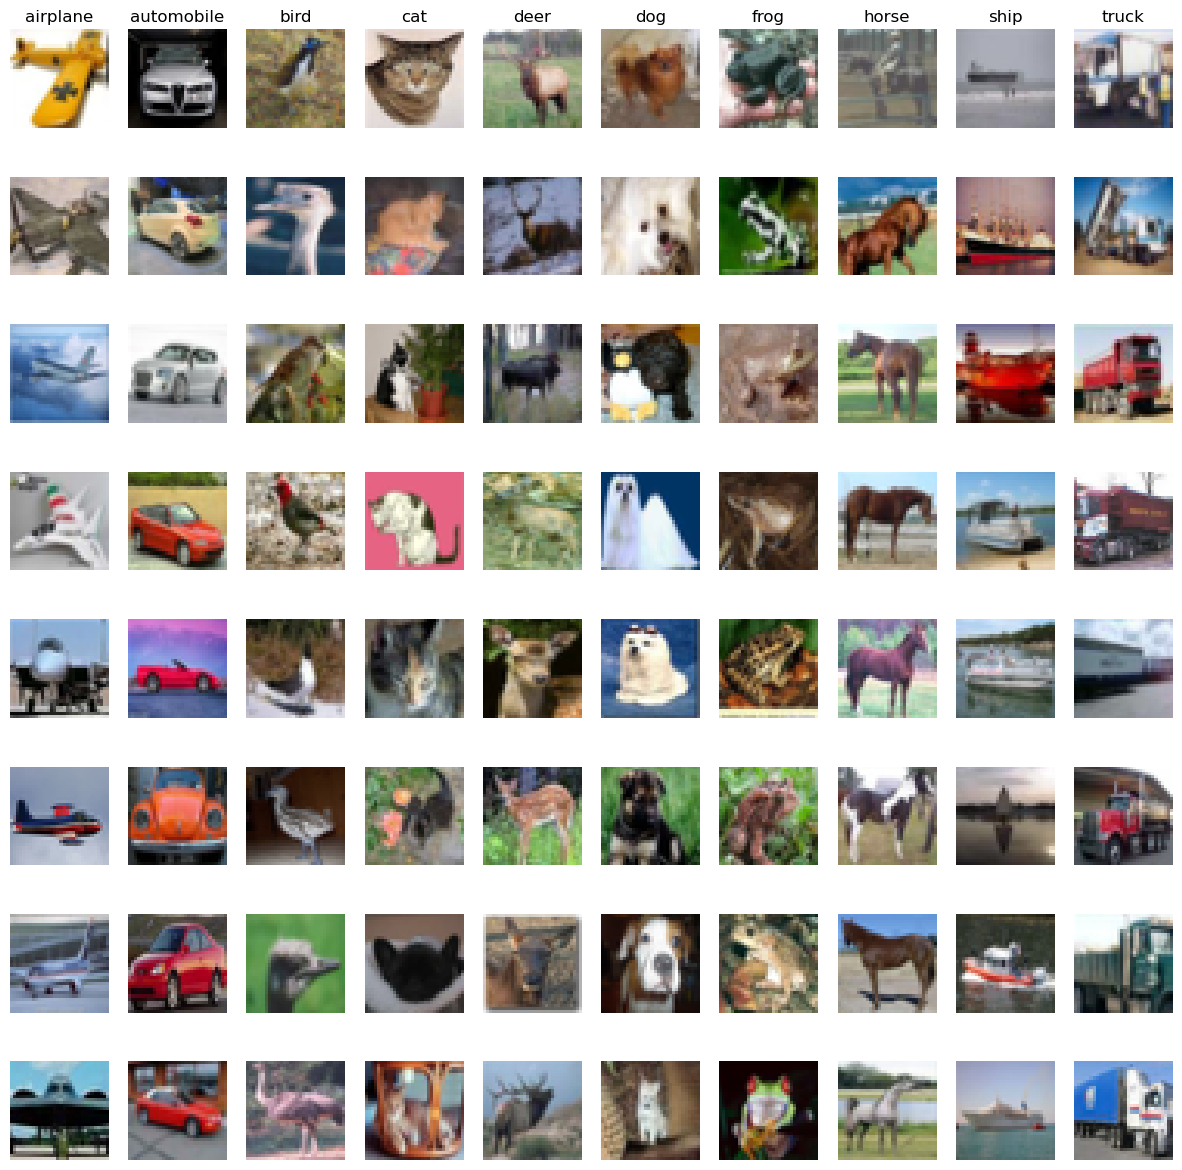

In [11]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')
            
            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid() 

### Calcular accuracy


In [12]:
def accuracy(model, loader):
    # We will recieve the model and DataLoader, which allows us to itereate over the dataset.
    correct = 0
    correct_total = 0
    model.eval() # Setting the model to evaluation mode, due to some difference in layer behavior when training and testing.
    model = model.to(device)
    with torch.no_grad(): # We don't need to calculate the gradients, so we can disable autograd to speed up the process.
        for x, y in loader:
            x = x.to(device=device, dtype=torch.float32) # Move the data to the device and set it to float32, to match the model's input and be precise.
            y = y.to(device=device, dtype=torch.long)
            scores = model(x) # Forward pass, we will get the scores for each class.
            _, predictions = scores.max(1) # Get the class with the highest score for each sample.
            correct += (predictions == y).sum() # If the class of the prediction is the same as the real one, we add it to the correct variable, we will be adding each correct prediction to this variable.
            correct_total += predictions.size(0) # Number of the samples in the batch.
        return float(correct) / correct_total

### Loop de entrenamiento

In [16]:
def train(model, optimiser, epochs=100):
    model.to(device=device) # Move the model to the device.
    model.train() # Set the model to training mode.
    for epoch in range(epochs):
        for x, y in train_loader:
            x = x.to(device=device, dtype=torch.float32) 
            y = y.to(device=device, dtype=torch.long)
            scores = model(x) 
            loss = F.cross_entropy(scores, y) # Calculate the loss.
            optimiser.zero_grad() # Delete the gradients calculated in the previous iteration, PyTorch does not do this automatically.
            loss.backward() # Backward pass, calculate the gradients.
            optimiser.step() # Update the weights.
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}, Accuracy: {accuracy(model, val_loader)}')

### Linear model

Our linear model has 3 layers, the first one has 512 neurons, the seond one 256, the third one 128 and the output layer has 10 for the 10 classes of the cifar10 dataset. We are going to iterate 20 times over the training set. 

Our architecture is the following:

* nn.Flatten(): We need to flatten the input to pass it to the linear layers. 
* nn.Linear(32*32*3, 512): The first layer has 512 neurons, the input size is 32*32*3 because we have 32x32 pixels and 3 channels (RGB).
* nn.BatchNorm1d(512): We use batch normalization to normalize the input of the layer.
* nn.ReLU(): We use the ReLU activation function.

* nn.Linear(512, 256): The second layer has 256 neurons.
* nn.BatchNorm1d(256)
* nn.ReLU()

* nn.Linear(256, 128): The third layer has 128 neurons.
* nn.BatchNorm1d(128)
* nn.ReLU()

* nn.Linear(128, 10): The output layer has 10 neurons, one for each class of the cifar10 dataset.

We are going to be using the CrossEntropyLoss() function to calculate the loss and the Adam optimizer to update the weights of the model.

In [34]:
hidden1 = 512
hidden2 = 256
hidden3 = 128
output_channels = 10
epochs = 20

model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=32*32*3, out_features=hidden1),
    nn.BatchNorm1d(hidden1),
    nn.ReLU(),

    nn.Linear(in_features=hidden1, out_features=hidden2),
    nn.BatchNorm1d(hidden2),
    nn.ReLU(),

    nn.Linear(in_features=hidden2, out_features=hidden3),
    nn.BatchNorm1d(hidden3),
    nn.ReLU(),

    nn.Linear(in_features=hidden3, out_features=output_channels)
)

optimiser = torch.optim.Adam(model1.parameters(), lr=1e-3)

In [35]:
train(model1, optimiser, epochs)

Epoch 1, Loss: 1.3105651140213013, Accuracy: 0.4862
Epoch 2, Loss: 1.3094305992126465, Accuracy: 0.503
Epoch 3, Loss: 1.0243933200836182, Accuracy: 0.5326
Epoch 4, Loss: 1.4879608154296875, Accuracy: 0.5324
Epoch 5, Loss: 1.033603549003601, Accuracy: 0.5466
Epoch 6, Loss: 0.7283336520195007, Accuracy: 0.555
Epoch 7, Loss: 1.126466989517212, Accuracy: 0.5584
Epoch 8, Loss: 0.94538414478302, Accuracy: 0.5532
Epoch 9, Loss: 1.100303053855896, Accuracy: 0.5628
Epoch 10, Loss: 0.5529067516326904, Accuracy: 0.561
Epoch 11, Loss: 0.7116028070449829, Accuracy: 0.557
Epoch 12, Loss: 0.41985228657722473, Accuracy: 0.549
Epoch 13, Loss: 0.8882246017456055, Accuracy: 0.554
Epoch 14, Loss: 0.4230040907859802, Accuracy: 0.5496
Epoch 15, Loss: 0.2185933142900467, Accuracy: 0.5492
Epoch 16, Loss: 0.420213520526886, Accuracy: 0.5478
Epoch 17, Loss: 0.09192726016044617, Accuracy: 0.558
Epoch 18, Loss: 0.4978385865688324, Accuracy: 0.5448
Epoch 19, Loss: 0.1196528747677803, Accuracy: 0.5466
Epoch 20, Los

In [65]:
accuracy(model1, test_loader)

0.5312

### Sequential CNN

We create a block of layers using the nn.Sequential(). It has the normal convulutional layers, batch normalization and ReLU activation functions.
In that way our implementation of forward is much cleaner and easier to understand.

In [45]:
def conv_k_3(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()
    )

Our CNNModel has 3 blocks of layers consisting of 3 layers each. 

In [62]:
class CNNModel(nn.Module):
    def __init__(self, in_channel, channel1, channel2, channel3):
        super().__init__()
        self.conv1 = conv_k_3(in_channel, channel1)
        self.conv2 = conv_k_3(channel1, channel2)
        self.conv3 = conv_k_3(channel2, channel3)
        
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(in_features=16*16*channel3, out_features=10)
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        x = self.conv3(self.conv2(self.conv1(x)))
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.fc(x)

In [63]:
in_channel = 3
channel1 = 16
channel2 = 32
channel3 = 64
epochs = 10
lr = 0.001
model2 = CNNModel(in_channel, channel1, channel2, channel3)
optimiser = torch.optim.Adam(model2.parameters(), lr=lr)

In [64]:
train(model2, optimiser, epochs)

Epoch 1, Loss: 1.5456920862197876, Accuracy: 0.5626
Epoch 2, Loss: 0.3688971698284149, Accuracy: 0.6582
Epoch 3, Loss: 0.9369356036186218, Accuracy: 0.6874
Epoch 4, Loss: 0.8633304834365845, Accuracy: 0.6786
Epoch 5, Loss: 0.6311708688735962, Accuracy: 0.6986
Epoch 6, Loss: 0.6892552375793457, Accuracy: 0.689
Epoch 7, Loss: 0.23412077128887177, Accuracy: 0.6832
Epoch 8, Loss: 0.32081925868988037, Accuracy: 0.6818
Epoch 9, Loss: 0.39020663499832153, Accuracy: 0.685
Epoch 10, Loss: 0.1469413936138153, Accuracy: 0.6672


With CNNModel we achieved an accuracy of 0.67, thats 0.14 more than the linear model. 
One of the biggest challenges we faced was to understand what was happeninig to the dimensions of the data in each layer and step of the process, in order for our matrix multiplications to be correct and work. 

In [66]:
accuracy(model2, test_loader)

0.6788